In [1]:
! wget http://fimi.uantwerpen.be/data/retail.dat.gz

--2023-11-25 19:46:50--  http://fimi.uantwerpen.be/data/retail.dat.gz
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1636819 (1.6M) [application/x-gzip]
Saving to: ‘retail.dat.gz’

retail.dat.gz       100%[===================>]   1.56M  1.77MB/s    in 0.9s    

2023-11-25 19:46:51 (1.77 MB/s) - ‘retail.dat.gz’ saved [1636819/1636819]



In [2]:
import gzip
import shutil
with gzip.open('retail.dat.gz', 'rb') as f_in:
    with open('retail.dat', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [3]:
dataset = []
for i in open("./retail.dat").readlines():
    dataset.append(list(map(int, i.strip().split())))


In [4]:
# Sampling
import numpy as np
dataset = np.random.choice(dataset, size = int(0.8 * len(dataset)))

In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,0,1,2,3,4,5,6,7,8,9,...,16460,16461,16462,16463,16464,16465,16466,16467,16468,16469
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88158,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88159,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Methods and Association Rules

In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support = 0.1)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.172036,(32),1
1,0.176902,(38),1
2,0.574794,(39),1
3,0.169517,(41),1
4,0.477927,(48),1
5,0.117341,"(38, 39)",2
6,0.129466,"(41, 39)",2
7,0.330551,"(48, 39)",2
8,0.102289,"(48, 41)",2


In [7]:
association_rules(frequent_itemsets, metric="support", min_threshold=0.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(38),(39),0.176902,0.574794,0.117341,0.663311,1.153998,0.015659,1.262904,0.162128
1,(39),(38),0.574794,0.176902,0.117341,0.204144,1.153998,0.015659,1.034230,0.313841
2,(41),(39),0.169517,0.574794,0.129466,0.763734,1.328708,0.032029,1.799689,0.297886
3,(39),(41),0.574794,0.169517,0.129466,0.225239,1.328708,0.032029,1.071921,0.581811
4,(48),(39),0.477927,0.574794,0.330551,0.691634,1.203273,0.055841,1.378900,0.323581
5,(39),(48),0.574794,0.477927,0.330551,0.575076,1.203273,0.055841,1.228628,0.397297
6,(48),(41),0.477927,0.169517,0.102289,0.214026,1.262562,0.021272,1.056629,0.398335
7,(41),(48),0.169517,0.477927,0.102289,0.603413,1.262562,0.021272,1.316413,0.250408


In [8]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(38),(39),0.176902,0.574794,0.117341,0.663311,1.153998,0.015659,1.262904,0.162128
1,(41),(39),0.169517,0.574794,0.129466,0.763734,1.328708,0.032029,1.799689,0.297886
2,(48),(39),0.477927,0.574794,0.330551,0.691634,1.203273,0.055841,1.378900,0.323581
3,(39),(48),0.574794,0.477927,0.330551,0.575076,1.203273,0.055841,1.228628,0.397297
4,(41),(48),0.169517,0.477927,0.102289,0.603413,1.262562,0.021272,1.316413,0.250408


In [9]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(df, min_support=0.1)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.172036,(32),1
1,0.574794,(39),1
2,0.176902,(38),1
3,0.169517,(41),1
4,0.477927,(48),1
5,0.117341,"(38, 39)",2
6,0.129466,"(41, 39)",2
7,0.102289,"(48, 41)",2
8,0.330551,"(48, 39)",2


In [10]:
association_rules(frequent_itemsets, metric="support", min_threshold=0.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(38),(39),0.176902,0.574794,0.117341,0.663311,1.153998,0.015659,1.262904,0.162128
1,(39),(38),0.574794,0.176902,0.117341,0.204144,1.153998,0.015659,1.034230,0.313841
2,(41),(39),0.169517,0.574794,0.129466,0.763734,1.328708,0.032029,1.799689,0.297886
3,(39),(41),0.574794,0.169517,0.129466,0.225239,1.328708,0.032029,1.071921,0.581811
4,(48),(41),0.477927,0.169517,0.102289,0.214026,1.262562,0.021272,1.056629,0.398335
5,(41),(48),0.169517,0.477927,0.102289,0.603413,1.262562,0.021272,1.316413,0.250408
6,(48),(39),0.477927,0.574794,0.330551,0.691634,1.203273,0.055841,1.378900,0.323581
7,(39),(48),0.574794,0.477927,0.330551,0.575076,1.203273,0.055841,1.228628,0.397297


In [11]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(38),(39),0.176902,0.574794,0.117341,0.663311,1.153998,0.015659,1.262904,0.162128
1,(41),(39),0.169517,0.574794,0.129466,0.763734,1.328708,0.032029,1.799689,0.297886
2,(41),(48),0.169517,0.477927,0.102289,0.603413,1.262562,0.021272,1.316413,0.250408
3,(48),(39),0.477927,0.574794,0.330551,0.691634,1.203273,0.055841,1.378900,0.323581
4,(39),(48),0.574794,0.477927,0.330551,0.575076,1.203273,0.055841,1.228628,0.397297


In [12]:
from mlxtend.frequent_patterns import fpmax

frequent_itemsets = fpmax(df, min_support=0.1)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.102289,"(48, 41)",2
1,0.129466,"(41, 39)",2
2,0.172036,(32),1
3,0.117341,"(38, 39)",2
4,0.330551,"(48, 39)",2


In [13]:
association_rules(frequent_itemsets, metric="support", min_threshold=0.1, support_only= True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(48),(41),NaN,NaN,0.102289,NaN,NaN,NaN,NaN,NaN
1,(41),(48),NaN,NaN,0.102289,NaN,NaN,NaN,NaN,NaN
2,(41),(39),NaN,NaN,0.129466,NaN,NaN,NaN,NaN,NaN
3,(39),(41),NaN,NaN,0.129466,NaN,NaN,NaN,NaN,NaN
4,(38),(39),NaN,NaN,0.117341,NaN,NaN,NaN,NaN,NaN
5,(39),(38),NaN,NaN,0.117341,NaN,NaN,NaN,NaN,NaN
6,(48),(39),NaN,NaN,0.330551,NaN,NaN,NaN,NaN,NaN
7,(39),(48),NaN,NaN,0.330551,NaN,NaN,NaN,NaN,NaN


## Computational Analysis

In [14]:
%timeit -n 2 -r 5 apriori(df, min_support=0.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.21 s ± 181 ms per loop (mean ± std. dev. of 5 runs, 2 loops each)


In [15]:
%timeit -n 2 -r 5 apriori(df, min_support=0.1, low_memory=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.25 s ± 130 ms per loop (mean ± std. dev. of 5 runs, 2 loops each)


In [16]:
%timeit -n 2 -r 5 fpgrowth(df, min_support=0.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.32 s ± 202 ms per loop (mean ± std. dev. of 5 runs, 2 loops each)


## Sensitivity Analysis

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def run_mlxtend_apriori (df, method, start = 0.05, end = 0.11, step = 0.01):
    # supports = np.linspace(0.05, 0.1, num=5)
    supports = np.arange(start, end, step, dtype=float)
    display_dict = dict()
    for support in supports :
        display_dict[support] = dict()
        if (method == "apriori"):
            frequent_itemsets = apriori(df, min_support=support)
        elif (method == "fpgrowth"):
            frequent_itemsets = fpgrowth(df, min_support=support)
        elif (method == "fpmax"):
            frequent_itemsets = fpmax(df, min_support=support)
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        # print(frequent_itemsets)
        info = np.unique(frequent_itemsets['length'], return_counts=True)
        k = 0
        for j in info[0]:
            display_dict[support][j] = info[1][k]
            k += 1

    list_val = []
    list_len = []
    for key in display_dict.keys():
        list_len.append(len(display_dict[key].keys()))
        list_val.append(list(display_dict[key].values()))

    maxx = max(list_len)
    for data in list_val:
        for _ in range(maxx - len(data)):
            data.append(0)

    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))
    # set height of bar

    # Set position of bar on X axis
    br = []
    for i, data in enumerate(list_val):
        if i == 0 :
            br.append(np.arange(len(list_val[i])) * 2)
        else:
            br.append([x + barWidth for x in br[i-1]])


    # Make the plot
    for i, data in enumerate(list_val):
        plt.bar(br[i], data, color =np.random.rand(3,), width = barWidth, edgecolor ='grey', label ="support " + str(supports[i]))

    # Adding Xticks
    plt.xlabel('Cardinal of Set', fontweight ='bold', fontsize = 15)
    plt.ylabel('Number of Itemset', fontweight ='bold', fontsize = 15)
    plt.xticks(br[2], np.arange(1, maxx+1))

    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


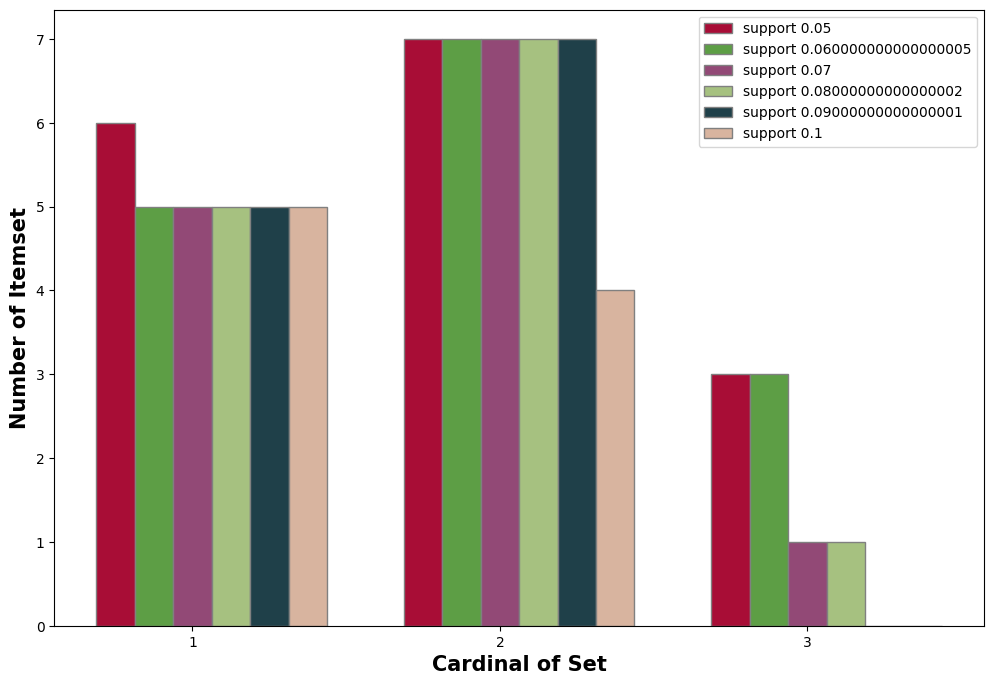

In [18]:
run_mlxtend_apriori (df, "apriori")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


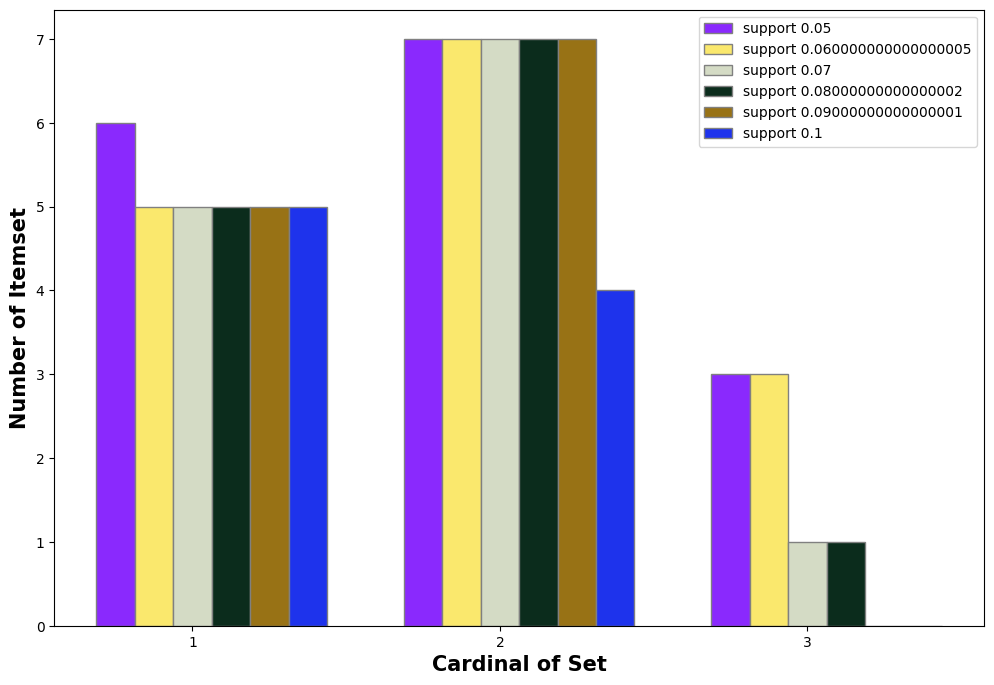

In [19]:
run_mlxtend_apriori (df, "fpgrowth")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


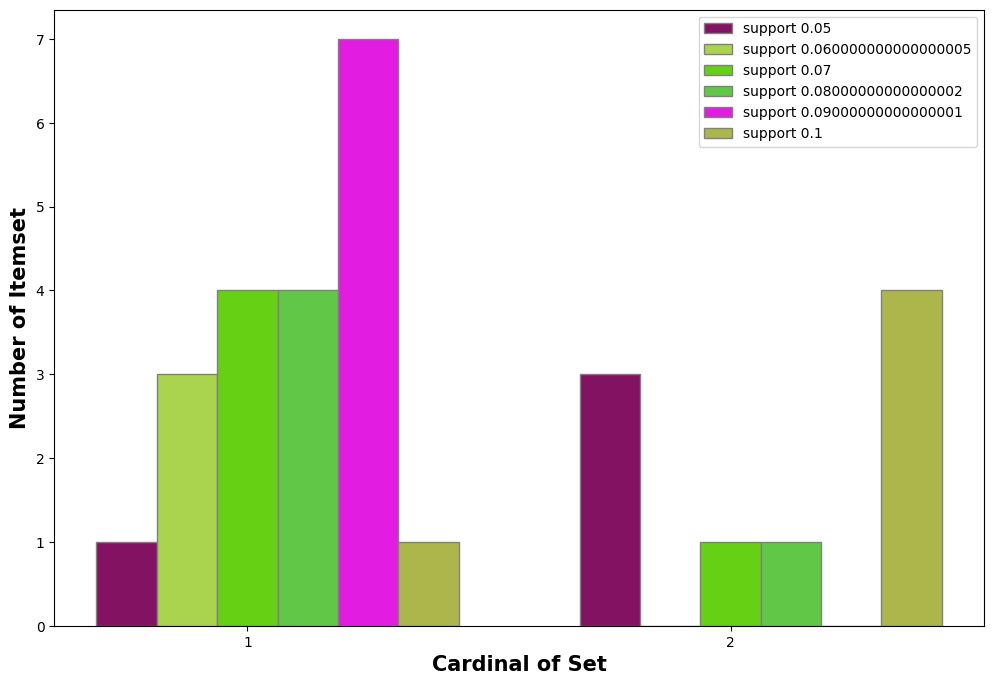

In [20]:
run_mlxtend_apriori (df, "fpmax")

## Mining Multi-Level Association on Apriori

In [21]:
def generate_candidates(current_candidates, ):
    new_candidates = []
    for i in range(len(current_candidates)):
        for j in range(i+1, len(current_candidates)):
            if (current_candidates[i][:-1] == current_candidates[j][:-1]):
                new = list(current_candidates[i][:-1])
                new.append(current_candidates[i][-1])
                new.append(current_candidates[j][-1])
                new_candidates.append(new)

    return(new_candidates)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
from collections import defaultdict

def getSup(dataset, candidates):
    localItemSetWithSup = defaultdict(int)

    for itemSet in dataset:
        for candidate in candidates:
            flag = True
            for item in candidate:
                if item not in itemSet:
                    flag = False
                    break
            if flag:
                localItemSetWithSup[tuple(candidate)] += 1

    return(localItemSetWithSup)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def getAboveMinSup(ItemSetWithSup, minSup):
    freqItemSet = set()
    for item, supCount in ItemSetWithSup.items():
        if(supCount >= minSup):
            freqItemSet.add(item)

    freqItemSet = list(freqItemSet)
    freqItemSet.sort()

    return(freqItemSet)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from collections import defaultdict

def getItemSetFromList(dataset):

    localItemSetWithSup = defaultdict(int)

    for itemSet in dataset:
        for item in itemSet:
            localItemSetWithSup[tuple([item])] += 1

    return (localItemSetWithSup)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
def apriori_(itemSetList, minSup_percentage, ):
    globalFreqItemSet = dict()
    FreqItemSet = dict()
    # minSup = int(len(itemSetList) * minSup_percentage)

    k = 1
    minSup = int(len(itemSetList) * minSup_percentage[k-1])
    Items = getItemSetFromList(itemSetList)
    globalFreqItemSet[k] = Items
    candidates = getAboveMinSup(Items, minSup)

    while(len(candidates) > 0):
        temp = dict()
        for candidate in candidates:
            temp[candidate] = globalFreqItemSet[k][candidate]
        FreqItemSet[k] = temp

        k += 1
        try:
            minSup = int(len(itemSetList) * minSup_percentage[k-1])
        except:
            minSup = int(len(itemSetList) * minSup_percentage[-1])

        candidates = generate_candidates(candidates, )
        support_candidates = getSup(dataset, candidates)
        globalFreqItemSet[k] = support_candidates
        candidates = getAboveMinSup(support_candidates, minSup)

    return(FreqItemSet)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
import pandas as pd
def DisplayResult(result):
    display_result = {"itemsets" : [],"support" : [] }
    for key in result.keys():
        for sub_key in result[key].keys():
            display_result["itemsets"].append(sub_key)
            display_result["support"].append(result[key][sub_key])
    print(pd.DataFrame.from_dict(display_result))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
out_put = apriori_(dataset, [0.1, 0.08, 0.06])#
DisplayResult(out_put)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        itemsets  support
0          (32,)    15167
1          (38,)    15596
2          (39,)    50675
3          (41,)    14945
4          (48,)    42135
5       (32, 39)     8455
6       (32, 48)     8034
7       (38, 39)    10345
8       (38, 48)     7944
9       (39, 41)    11414
10      (39, 48)    29142
11      (41, 48)     9018
12  (32, 39, 48)     5402
13  (38, 39, 48)     6102
14  (39, 41, 48)     7366


In [28]:
%timeit -n 2 -r 5 apriori_(dataset, [0.1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


390 ms ± 61.7 ms per loop (mean ± std. dev. of 5 runs, 2 loops each)


## Negative Correlated Patterns

In [29]:
from collections import defaultdict

def getItem_list(dataset):

    localItemSetWithSup = defaultdict(int)
    localItemSetIntersection = defaultdict(int)
    item_list = []

    for itemSet in (dataset):
        for i, item in enumerate(itemSet):
            localItemSetWithSup[tuple([item])] += 1
            item_list.append(item)

            for j in range(i+1, len(itemSet)):
                localItemSetIntersection[tuple([item, itemSet[j]])] += 1

    item_list = set(item_list)
    item_list = list(item_list)

    return (localItemSetWithSup, localItemSetIntersection, item_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
def definition_1 (ItemSetWithSup, ItemSetIntersection, ListOfIten, length_dataset):
    negatively_correlated = []

    for i, item in enumerate(ListOfIten):
        length_A = ItemSetWithSup[tuple([item])]

        for j in range(i+1, len(ListOfIten)):
            length_B = ItemSetWithSup[tuple([ListOfIten[j]])]
            IntersectionNum = ItemSetIntersection[tuple([item, ListOfIten[j]])] + ItemSetIntersection[tuple([ListOfIten[j], item])]

            if (IntersectionNum < ((length_A*length_B)/length_dataset)):
                negatively_correlated.append((item, ListOfIten[j]))

    return(negatively_correlated)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
def definition_2 (ItemSetWithSup, ItemSetIntersection, ListOfIten, length_dataset, mu):
    negatively_correlated = []
    length_dataset = len(dataset)

    for i, item in enumerate(ListOfIten):
        length_A = ItemSetWithSup[tuple([item])]

        for j in range(i+1, len(ListOfIten)):
            length_B = ItemSetWithSup[tuple([ListOfIten[j]])]
            IntersectionNum = ItemSetIntersection[tuple([item, ListOfIten[j]])] + ItemSetIntersection[tuple([ListOfIten[j], item])]

            if (IntersectionNum / length_dataset > mu):
                if (IntersectionNum < ((length_A*length_B)/length_dataset)):
                    negatively_correlated.append((item, ListOfIten[j]))

    return(negatively_correlated)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
def definition_3 (ItemSetWithSup, ItemSetIntersection, length_dataset, minSup_percentage, epsilon):
    minSup = int(length_dataset * minSup_percentage)
    negatively_correlated = []
    freqItemSet = set()

    for item, supCount in ItemSetWithSup.items():
        if(supCount >= minSup):
            freqItemSet.add(item[0])
    freqItemSet = list(freqItemSet)
    freqItemSet.sort()

    for i, item in enumerate(freqItemSet):
        length_A = ItemSetWithSup[tuple([item])]

        for j in range(i+1, len(freqItemSet)):
            length_B = ItemSetWithSup[tuple([freqItemSet[j]])]
            IntersectionNum = ItemSetIntersection[tuple([item, freqItemSet[j]])] + ItemSetIntersection[tuple([freqItemSet[j], item])]
            P_condition = ((IntersectionNum / length_A) + (IntersectionNum / length_B)) * 0.5

            if (P_condition < epsilon):
                    negatively_correlated.append((item, freqItemSet[j]))

    return(negatively_correlated)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import numpy as np

def Negative_Correlated_Patterns (dataset, definition, mu = 0.0001, freq_sup = 0.01, epsilon = 0.001):
    ItemSetWithSup, ItemSetIntersection, ListOfItem = getItem_list(dataset)

    List_Item = list(np.sort(np.random.choice( ListOfItem, size = int( 0.1 * len(ListOfItem)) )))

    if (definition == 1):
        return (definition_1 (ItemSetWithSup, ItemSetIntersection, List_Item, len(dataset)))
    elif (definition == 2):
        return (definition_2 (ItemSetWithSup, ItemSetIntersection, List_Item, len(dataset), mu))
    elif (definition == 3):
        return (definition_3 (ItemSetWithSup, ItemSetIntersection, len(dataset), freq_sup, epsilon))
    else:
        print("Wrong definition")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
NCP = Negative_Correlated_Patterns (dataset, 1)
len(NCP)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1323211

In [35]:
NCP = Negative_Correlated_Patterns (dataset, 2)
NCP

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(10, 38),
 (10, 270),
 (10, 38),
 (10, 270),
 (24, 38),
 (26, 38),
 (38, 76),
 (38, 165),
 (38, 184),
 (38, 190),
 (38, 244),
 (38, 275),
 (38, 297),
 (38, 380),
 (38, 381),
 (38, 392),
 (38, 402),
 (38, 407),
 (38, 407),
 (38, 416),
 (38, 445),
 (38, 448),
 (38, 525),
 (38, 560),
 (38, 574),
 (38, 639),
 (38, 691),
 (38, 697),
 (38, 698),
 (38, 708),
 (38, 736),
 (38, 813),
 (38, 829),
 (38, 897),
 (38, 899),
 (38, 904),
 (38, 921),
 (38, 926),
 (38, 1008),
 (38, 1082),
 (38, 1096),
 (38, 1123),
 (38, 1143),
 (38, 1143),
 (38, 1165),
 (38, 1198),
 (38, 1215),
 (38, 1219),
 (38, 1239),
 (38, 1257),
 (38, 1268),
 (38, 1281),
 (38, 1310),
 (38, 1330),
 (38, 1373),
 (38, 1403),
 (38, 1425),
 (38, 1433),
 (38, 1456),
 (38, 1503),
 (38, 1513),
 (38, 1548),
 (38, 1616),
 (38, 1693),
 (38, 1704),
 (38, 1755),
 (38, 1771),
 (38, 1809),
 (38, 1811),
 (38, 1821),
 (38, 1822),
 (38, 1833),
 (38, 1859),
 (38, 1879),
 (38, 1903),
 (38, 1911),
 (38, 1915),
 (38, 1971),
 (38, 1972),
 (38, 1973),
 (3

In [36]:
len(NCP)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


178

In [37]:
NCP = Negative_Correlated_Patterns (dataset, 3)
print(NCP)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(45, 438), (60, 15832), (60, 16217), (161, 956), (258, 677), (310, 3270), (783, 16217), (1327, 12925), (1327, 13041), (1327, 15832), (1327, 16217), (13041, 15832), (13041, 16010), (13041, 16217), (15832, 16010), (15832, 16217), (16010, 16217)]


In [38]:
len(NCP)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


17